# Summary of X2K Random Search

## Import data

In [7]:
%matplotlib inline
savePlots=False
# d1 = pd.read_csv('Data/process_minNetworkSize-30.csv')
# d2 = pd.read_csv('Data/process.csv')
#results = pd.concat([d1,d2])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
figDir = 'Figures/'


results = pd.read_csv('Data/RandomSearchResults.csv')
# 'score' = -log(pvalue) of each predicted kinase
# score = 1  when kinase is non-sig (explicitly assigned)
# score = nan when X2K timed-out/crashed
results.dropna(subset=['score'], inplace=True)
print(str(len(results))+' instances tested')
results.head()

12279 instances tested


,TF-target gene background database used for enrichment.ChEA 2015,TF-target gene background database used for enrichment.ENCODE 2015,TF-target gene background database used for enrichment.ChEA & ENCODE Consensus,TF-target gene background database used for enrichment.Transfac and Jaspar,TF-target gene background database used for enrichment.ChEA 2016,TF-target gene background database used for enrichment.ARCHS4 TFs Coexp,TF-target gene background database used for enrichment.CREEDS,TF-target gene background database used for enrichment.Enrichr Submissions TF-Gene Coocurrence,kinase interactions to include.kea 2018,kinase interactions to include.ARCHS4,...,enable_ppi.iREF,enable_ppi.Stelzl,enable_ppi.vidal,enable_ppi.BIND,enable_ppi.figeys,enable_ppi.HPRD,score,n_g2n_nodes,n_sig_kinase,kinase
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,100.0,10.0,FLT1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,SRC
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,22.0,9.0,PRKCA
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0,4.0,ULK1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,130.0,4.0,MET


## General Resources

In [8]:
def parameterStats(newDF, independentVar, dependentVar, dependentVarName, dependentVarLabel, writeExcel='No'):
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    import numpy as np
    import pandas.tseries as datetools
    def anovaTable(Data, independentVar, dependentVar, dependentVarName, dependentVarLabel):
        # One way ANOVA
        mod = ols(independentVar+' ~ '+dependentVar,data=Data).fit()
        aov_table = sm.stats.anova_lm(mod, typ=2)
        #esq_sm = aov_table['sum_sq'][0] / (aov_table['sum_sq'][0] + aov_table['sum_sq'][1])
        p = aov_table['PR(>F)'][0]
        # Add P-val summary
        if p >= 0.05:
            aov_table['Sig'] = "non-sig"
            P = "≥ 0.05"
        if p < 0.05:
            aov_table['Sig'] = '*'
            P = "< 0.05"
        if p < 0.01:
            aov_table['Sig'] = '**'
            P = "< 0.01"
        if p < 0.001:
            aov_table['Sig'] ='***'
            P = "< 0.001"
        if p < 0.0001:
            aov_table['Sig'] = '****'
            P = "< 0.0001"
        # mod.summary() # For full summary
        SS = int(round(float(aov_table.iloc[0].sum_sq), 3))
        Sig= aov_table['Sig'][0]
        F = int(round(float(aov_table.iloc[0].F),0))
        df = int(aov_table.df[0])
        newTable = pd.DataFrame(np.column_stack([dependentVarName, SS, df, F, P, Sig]),\
                                columns=[dependentVarLabel,"SS","DF","F-value","P-value","Sig."])
        return newTable
    
    parameterResults = anovaTable(newDF, independentVar, dependentVar, dependentVarName, dependentVarLabel)

    if writeExcel != 'No':
        # Write AOV results to excel file
        print("Writing AOV results to excel file...")
        writer = pd.ExcelWriter(writeExcel)
        print("***** Fitness.Vs.Parameters *****")
        parameterResults.to_excel(writer, 'Fitness.Vs.Parameters')
        # print()
        # print("***** Fitness.Vs.baselineFitness *****")
        # baselineResults.to_excel(writer, 'Fitness.Vs.baselineFitness')
        writer.save()
    return parameterResults

def transformDF(resultsDF, selectCols, remove1s=False):
    newDF = pd.DataFrame()
    for col in selectCols:
        db = col.split('.')[1]
        sub = results.loc[results[col]==1, ['score']]
        sub['Database'] = db
        newDF = pd.concat([newDF, sub])
    newDF =  newDF.sort_values(by='score').dropna()
    if remove1s==True:
        newDF = newDF[newDF['score']!=1]
    groupedDF = newDF.groupby('Database')['score'].mean().reset_index()
    groupedDF = groupedDF.sort_values(by='score', ascending=False)
    return newDF, groupedDF

def percentHits(dbCols):
    dbNames=[]; percentHits=[]
    for col in dbCols:
        # Whenever a database was turned on, what % of the time was the score 1 (a kinase miss?)
        dbUsed =  results.loc[results[col]==1].dropna(subset=['score'], axis=0)
        dbHits =  dbUsed.loc[dbUsed['score']>1, [col,'score']]
        percentHits.append( len(dbHits) / len(dbUsed)*100)
        dbNames.append(col.split(".")[1])
    df = pd.DataFrame({'Database':dbNames,'% Kinases Recovered':percentHits}).sort_values(by='% Kinases Recovered', ascending=False)
    return df

## TF

### TF Database Plots

In [9]:
tfCols= [x for x in results.columns if x.startswith('TF-target')]
newDF_tf, groupedDF_tf = transformDF(results, tfCols, remove1s=True)

newDF = newDF_tf
groupedDF = groupedDF_tf

## % of Kinases Recovered by Database

In [10]:
percentHits_TF = percentHits(tfCols)
percentHits_TF

,% Kinases Recovered,Database
3,23.382447,Transfac and Jaspar
1,21.428571,ENCODE 2015
2,20.471976,ChEA & ENCODE Consensus
6,18.861681,CREEDS
0,18.061964,ChEA 2015
4,16.830386,ChEA 2016
5,5.697446,ARCHS4 TFs Coexp
7,4.461440,Enrichr Submissions TF-Gene Coocurrence


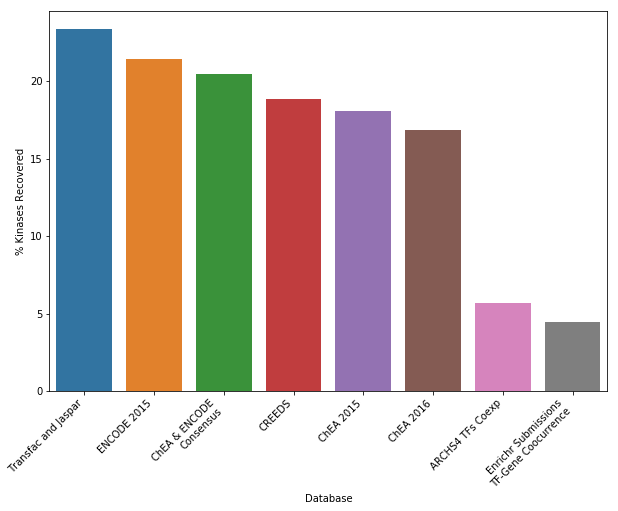

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=percentHits_TF, x='Database', y='% Kinases Recovered')
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels([textwrap.fill(t.get_text(), 20)  for t in ax.get_xticklabels()])
if savePlots==True:
    plt.savefig(figDir+'TF_%missed.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.gcf().set_facecolor('white');

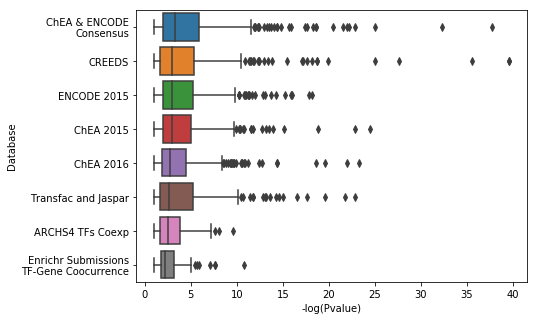

In [12]:
## Box plot
# fig, ax = plt.subplots(figsize=(10,7))
# orderedCols = newDF.groupby('Database').mean().sort_values(by='score', ascending=False).index
# ax = sns.boxplot(x="Database", y="score", data=newDF, order=orderedCols, ax=ax)
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('-log(Pvalue)')
# ax.set_xticklabels([textwrap.fill(t.get_text(), 20)  for t in ax.get_xticklabels()])
# #plt.savefig(figDir+'TF_DBs_filt.eps', format='eps', dpi=1000)
# plt.gcf().set_facecolor('white');




## Horizontal Box plot
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.boxplot(y="Database", x="score", data=newDF, order=groupedDF['Database'], ax=ax)
ax.set_yticklabels([textwrap.fill(t.get_text(), 20)  for t in ax.get_yticklabels()])
plt.xlabel('-log(Pvalue)')
# plt.subplots_adjust(left=.5)
if savePlots==True:
    plt.savefig(figDir+'/TF_DBs_filt_horiz.eps', format='eps', dpi=1000, bbox_inches='tight');
plt.gcf().set_facecolor('white');

### TF Database Analyses

In [13]:
aovResults = parameterStats(newDF_tf, 'score','Database', 'TF Database', '')
aovResults

/Users/schilder/Library/Python/3.6/lib/python/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,,SS,DF,F-value,P-value,Sig.
0,TF Database,575,7,5,< 0.0001,****


## PPI

### PPI Database Plots

In [14]:
# Setup DF
ppiDBCols = [x for x in results.columns if x.startswith('enable_ppi.')]
len(ppiDBCols)
newDF_ppi, groupedDF_ppi = transformDF(results, ppiDBCols, remove1s=True)
newDF = newDF_ppi
groupedDF = groupedDF_ppi

## % Kinases Recovered by Database

In [15]:
percentHits_PPI = percentHits(ppiDBCols)
percentHits_PPI

,% Kinases Recovered,Database
9,33.796296,ppid
15,29.717587,figeys
11,29.651941,iREF
8,17.378998,MINT
6,16.839742,IntAct
0,16.083333,Biocarta
7,15.892758,KEGG
1,15.473251,BioGRID
5,15.415020,InnateDB
4,15.205479,huMAP


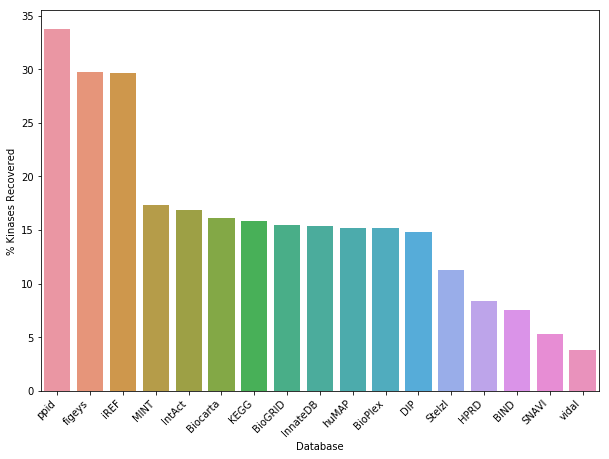

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=percentHits_PPI, x='Database', y='% Kinases Recovered')
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels([textwrap.fill(t.get_text(), 20)  for t in ax.get_xticklabels()])
if savePlots==True:
    plt.savefig(figDir+'PPI_%missed.eps', format='eps', dpi=1000)
plt.gcf().set_facecolor('white');

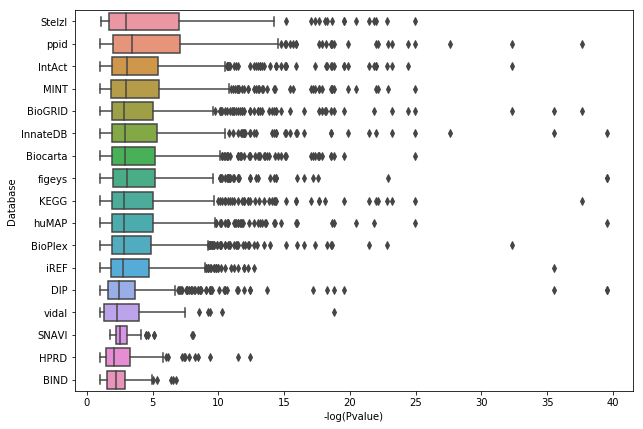

In [17]:
## Horizontal Box plot
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(y="Database", x="score", data=newDF, order=groupedDF['Database'], ax=ax)
plt.xlabel('-log(Pvalue)')
if savePlots==True:
    plt.savefig(figDir+'/PPI_DBs_filt_horiz.eps', format='eps', dpi=1000, bbox_inches='tight');
plt.gcf().set_facecolor('white') ;

### PPI Database Analyses

In [18]:
aovResults = parameterStats(newDF_ppi, 'score','Database', 'PPI Database', '')
aovResults

,,SS,DF,F-value,P-value,Sig.
0,PPI Database,2188,16,9,< 0.0001,****


## PPI Size Plots

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


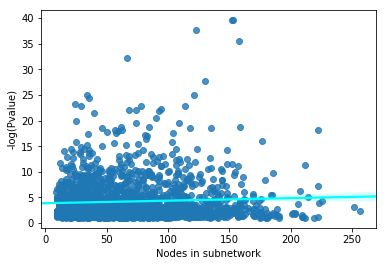

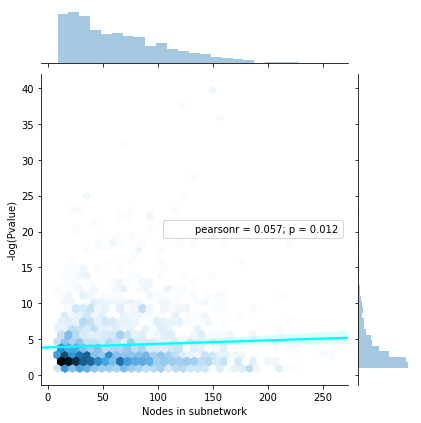

In [19]:
df_nodes = results[['score','n_g2n_nodes']].dropna()
df_nodes = df_nodes[df_nodes['score']!=1]

rg = sns.regplot(df_nodes['n_g2n_nodes'], df_nodes['score'], line_kws={'color': 'cyan'})
plt.ylabel('-log(Pvalue)')
plt.xlabel('Nodes in subnetwork')
plt.gcf().set_facecolor('white')
#plt.savefig(figDir+'/PPIsize.png', format='png', dpi=1000, bbox_inches='tight');

sns.jointplot(x="n_g2n_nodes", y="score", data=df_nodes, kind="hex")\
    .plot_joint(sns.regplot,  scatter_kws={'alpha':0.0, 'color': 'b'}, line_kws={'color': 'cyan'}) #, lowess=True
plt.ylabel('-log(Pvalue)')
plt.xlabel('Nodes in subnetwork')
if savePlots==True:
    plt.savefig(figDir+'/PPIsize_hex.png', format='png', dpi=1000, bbox_inches='tight');

plt.gcf().set_facecolor('white');

## PPI Size Analyses

In [20]:
# ANOVA
aovResults = parameterStats(df_nodes, 'score','n_g2n_nodes', 'PPI Size', '')
aovResults

,,SS,DF,F-value,P-value,Sig.
0,PPI Size,98,1,6,< 0.05,*


## KINASE Database Plots

In [21]:
# Setup DF
kinDBCols = [x for x in results.columns if x.startswith('kinase interactions to include.')]
len(kinDBCols)
newDF_kin, groupedDF_kin = transformDF(results, kinDBCols, remove1s=True)
newDF = newDF_kin
groupedDF = groupedDF_kin

## % Kinases Recovered by Database

In [22]:
percentHits_KIN = percentHits(kinDBCols)
percentHits_KIN

,% Kinases Recovered,Database
1,17.952237,ARCHS4
5,16.729122,Phosphopoint
0,16.671207,kea 2018
6,16.547554,PhosphoPlus
7,16.415043,MINT
2,16.244493,iPTMnet
3,15.549374,NetworkIN
4,15.522966,Phospho


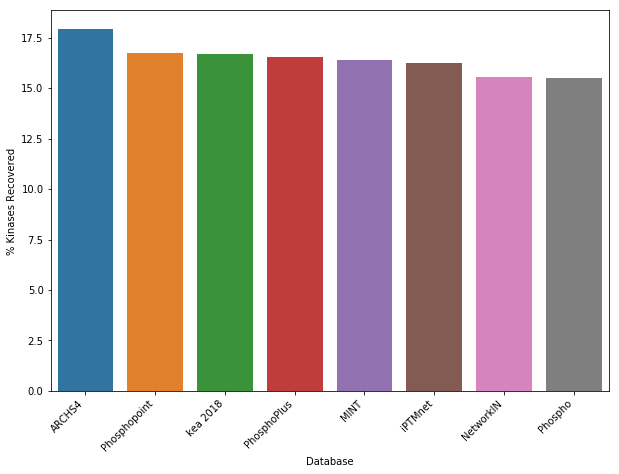

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=percentHits_KIN, x='Database', y='% Kinases Recovered')
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels([textwrap.fill(t.get_text(), 20)  for t in ax.get_xticklabels()])
if savePlots==True:
    plt.savefig(figDir+'KINASE_%missed.eps', format='eps', dpi=1000)
plt.gcf().set_facecolor('white');

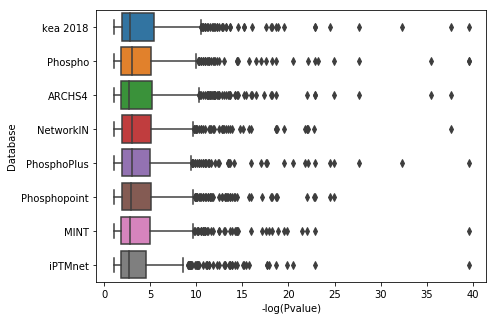

In [24]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.boxplot(y="Database", x="score", data=newDF, order=groupedDF['Database'], ax=ax)
ax.set_yticklabels([textwrap.fill(t.get_text(), 20)  for t in ax.get_yticklabels()])
plt.xlabel('-log(Pvalue)')
if savePlots==True:
    plt.savefig(figDir+'/KINASE_DBs_horiz.eps', format='eps', dpi=1000, bbox_inches='tight');
plt.gcf().set_facecolor('white') ;

## KINASE Database Analyses

In [25]:
aovResults = parameterStats(newDF_kin, 'score','Database', 'KINASE Database', '')
aovResults

,,SS,DF,F-value,P-value,Sig.
0,KINASE Database,101,7,1,≥ 0.05,non-sig


## KINASE Significant Kinases Plot

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


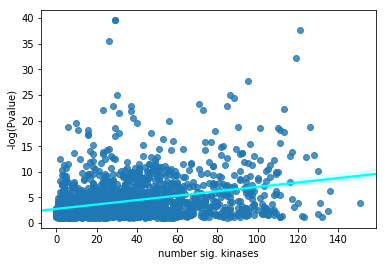

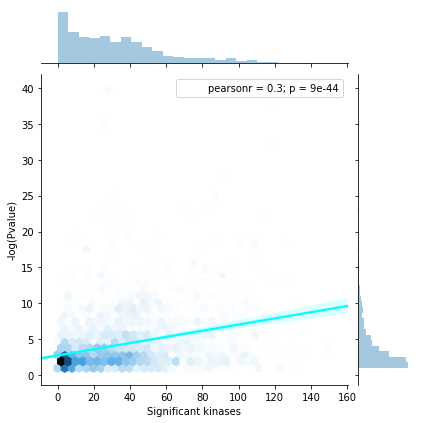

In [26]:
df_sigKinases = results[['score','n_sig_kinase']].dropna()
df_sigKinases = df_sigKinases[df_sigKinases['score']!=1]

rg = sns.regplot(df_sigKinases['n_sig_kinase'], df_sigKinases['score'], line_kws={'color': 'cyan'})
plt.ylabel('-log(Pvalue)')
plt.xlabel('number sig. kinases')
plt.gcf().set_facecolor('white')
#plt.savefig(figDir+'/KINASEsig.png', format='png', dpi=1000, bbox_inches='tight');


sns.jointplot(x="n_sig_kinase", y="score", data=df_sigKinases, kind="hex")\
    .plot_joint(sns.regplot,  scatter_kws={'alpha':0.0, 'color': 'b'}, line_kws={'color': 'cyan'}) #, lowess=True
plt.ylabel('-log(Pvalue)')
plt.xlabel('Significant kinases')
if savePlots==True:
    plt.savefig(figDir+'/KINASEsig_hex.png', format='png', dpi=1000, bbox_inches='tight');
plt.gcf().set_facecolor('white');

## KINASE Significant Kinases Analyses

In [27]:
# ANOVA
aovResults = parameterStats(df_sigKinases, 'score','n_sig_kinase', 'Fitness vs. Significant Kinases', '')
aovResults

,,SS,DF,F-value,P-value,Sig.
0,Fitness vs. Significant Kinases,2837,1,202,< 0.0001,****


## Target Kinase biases

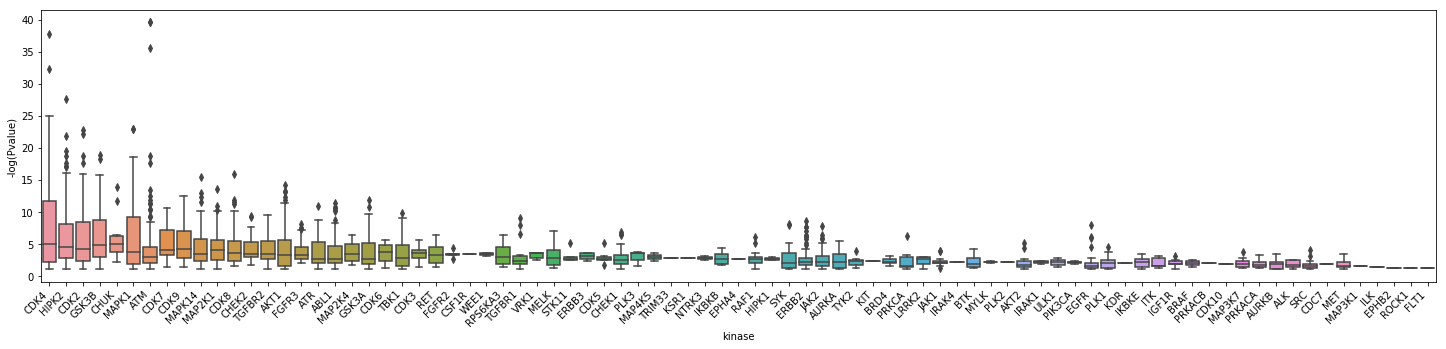

In [28]:
newDF = results[['score','kinase']]
newDF = newDF[newDF['score']!=1]

## Box plot
fig, ax = plt.subplots(figsize=(25,5))
orderedCols = newDF.groupby('kinase').mean().sort_values(by='score', ascending=False).reset_index().dropna()['kinase']
ax = sns.boxplot(x="kinase", y="score", data=newDF, order=orderedCols, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.ylabel('-log(Pvalue)')
if savePlots==True:
    plt.savefig(figDir+'/KINASEbias.eps', format='eps', dpi=1000, bbox_inches='tight');
plt.gcf().set_facecolor('white');

In [29]:
# ANOVA
aovResults = parameterStats(newDF, 'score','kinase', 'Fitness vs. Target Kinase', '')
aovResults

,,SS,DF,F-value,P-value,Sig.
0,Fitness vs. Target Kinase,5187,82,5,< 0.0001,****


## Combined ANOVA Dataframe

## Optimized Parameters: Based on Rank Sums of '% kinases recovered' and 'mean score'

In [30]:
ANOVAtable = pd.concat([parameterStats(newDF_tf, 'score','Database', 'TF Database', ''),\
                        parameterStats(newDF_ppi, 'score','Database', 'PPI Database', ''), 
                        parameterStats(newDF_kin, 'score','Database', 'Kinase Database', '')])
ANOVAtable

,,SS,DF,F-value,P-value,Sig.
0,TF Database,575,7,5,< 0.0001,****
0,PPI Database,2188,16,9,< 0.0001,****
0,Kinase Database,101,7,1,≥ 0.05,non-sig


## Optimized Parameters: Based on Rank Sums of '% kinases recovered' and 'mean score'

In [31]:
def getConsensus(df1, df2):
    df1['ranks1'] = range(0,len(df1))
    df2['ranks2'] = range(0,len(df2))
    df = df1.merge(df2,on='Database')
    df['rankSum'] = df['ranks1'] + df['ranks2']
    df = df.sort_values(by=['rankSum'])
    return df

In [32]:
topDB_TF = getConsensus(groupedDF_tf, percentHits_TF)['Database'][0]
print('Top TF Database::  '+ topDB_TF)

topDB_PPI = getConsensus(groupedDF_ppi, percentHits_PPI)['Database'][:5]
print('Top 5 PPI Databases::  '+", ".join(topDB_PPI))

topDB_KIN = getConsensus(groupedDF_kin, percentHits_KIN)['Database'][0]
print('Top KINASE Database::  '+topDB_KIN)

Top TF Database::  ChEA & ENCODE Consensus
Top 5 PPI Databases::  ppid, IntAct, MINT, figeys, BioGRID
Top KINASE Database::  kea 2018


# Summary

## Summary Plots

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


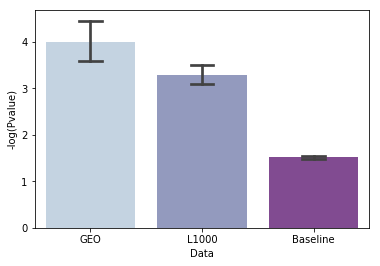

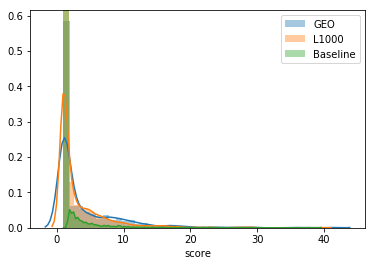

In [33]:
GEO = pd.read_csv('Data/final-GEO.csv').dropna()
GEO['Data'] = 'GEO'
len(GEO)

L1000 = pd.read_csv('Data/final-L1000.csv').dropna()
L1000['Data'] = 'L1000'
len(L1000)

baseline = results[['score','n_g2n_nodes','n_sig_kinase','kinase']]
baseline['Data']= 'Baseline'
len(baseline)

combined = pd.concat([GEO, L1000, baseline])
combined.head()

# Barplot
plt.figure()
sns.barplot(data=combined, x='Data', y='score', palette='BuPu', capsize=.2)
plt.ylabel('-log(Pvalue)')
plt.gcf().set_facecolor('white');

# Histogram w/ KDE
plt.figure()
sns.distplot(GEO['score'], label='GEO')
sns.distplot(L1000['score'], label='L1000')
sns.distplot(baseline['score'], label='Baseline')
plt.legend()
plt.gcf().set_facecolor('white');

## Summary Analyses

In [34]:
summaryANOVA = parameterStats(combined, 'score','Data', 'Data', '')
summaryANOVA

,,SS,DF,F-value,P-value,Sig.
0,Data,6851,2,564,< 0.0001,****


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(combined['score'], combined['Data'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
Baseline  GEO    2.4893   2.2404  2.7381  True 
Baseline L1000   1.7797   1.6166  1.9428  True 
  GEO    L1000  -0.7096  -0.9978 -0.4213  True 
-----------------------------------------------
['Baseline' 'GEO' 'L1000']


In [36]:
# Naive Chance Levels
import pandas as pd
uberKEA = pd.read_csv('../X2K_Summaries/UberKeaFile/UberKeaFile.csv')
uberKEA.head()
uniqueKinases = uberKEA.iloc[:,2].unique().__len__()
print(str(uniqueKinases) + " unique kinases in KEA 2018")
print()
print("Chance = "+str(round(1/uniqueKinases,5)))

649 unique kinases in KEA 2018

Chance = 0.00154


In [36]:
# Binary distribution: get or didnt get
## Null 1: we recovered anything
## Null 2: we're doing better than baseline
# t-test
import numpy as np
combined['Binary'] = np.where(combined['score']>1, '1', '0')
combined.head()


from scipy.stats import ttest_ind
GEO_bin = combined[combined['Data']=='GEO']['Binary'].astype(int)
Baseline_bin = combined[combined['Data']=='Baseline']['Binary'].astype(int)
L1000_bin = combined[combined['Data']=='L1000']['Binary'].astype(int)

print('GEO Trained vs. GEO Baseline')
ttest_ind(GEO_bin, Baseline_bin)